In [2]:
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('horse.csv')

In [15]:
# 提取点的坐标 
points = df[['x', 'y', 'z']].values

In [5]:
# 计算距离矩阵
dist_matrix = distance_matrix(points, points)

In [6]:
# 使用Scipy计算最小生成树
mst = minimum_spanning_tree(dist_matrix).toarray()


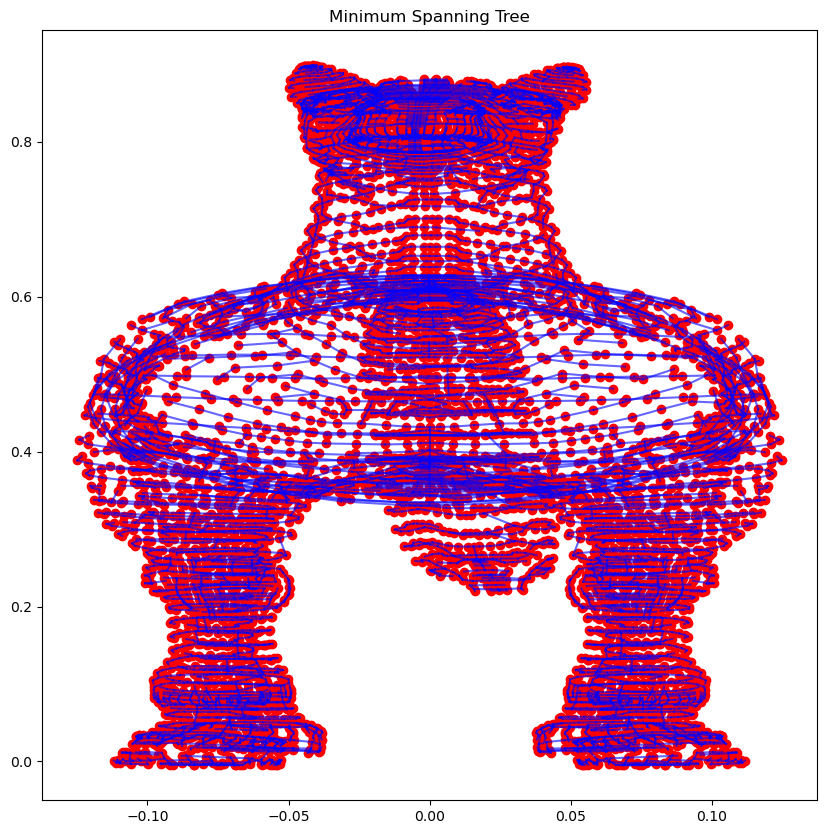

In [9]:
# 可视化最小生成树
def plot_mst(points, mst):
    plt.figure(figsize=(10, 10))
    for i in range(len(mst)):
        for j in range(i + 1, len(mst)):
            if mst[i, j] != 0:
                plt.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], 'b-', alpha=0.6)
    plt.scatter(points[:, 0], points[:, 1], c='r', marker='o')
    plt.title('Minimum Spanning Tree')
    plt.show()
# 由于MST保留了点之间的连接，可以对2D平面上的点进行可视化
plot_mst(points[:, :2], mst)

In [16]:
from sklearn.cluster import KMeans
# 使用KMeans将数据分割为多个子集 (分成3个子集)
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(points)

In [17]:
# 创建一个函数，针对每个子集构建MST
def compute_mst(subset):
    dist_matrix = distance_matrix(subset, subset)
    mst = minimum_spanning_tree(dist_matrix).toarray()
    return mst

In [18]:
# 存储每个子集的MST
msts = []
centroids = kmeans.cluster_centers_  # 获取每个子集的中心点
for i in range(np.max(labels) + 1):
    subset = points[labels == i]
    mst = compute_mst(subset)
    msts.append((subset, mst))

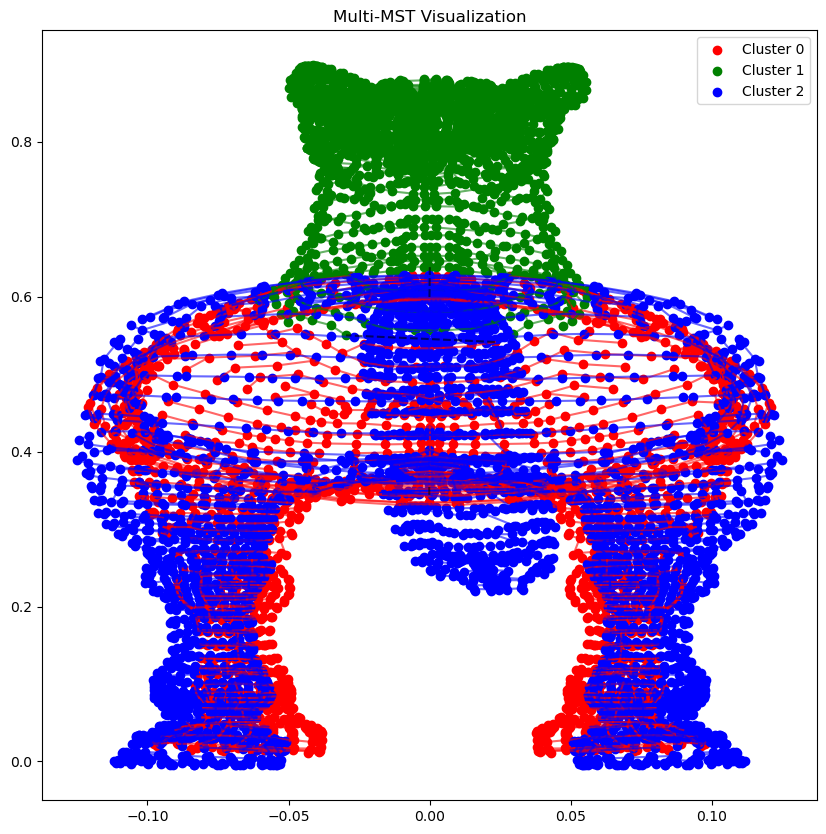

In [19]:
# 可视化每个子集的MST，并连接各个子集的最近邻点
def plot_multi_mst(msts, centroids):
    plt.figure(figsize=(10, 10))
    colors = ['r', 'g', 'b', 'c', 'm', 'y']
    
    # 绘制每个局部MST
    for idx, (subset, mst) in enumerate(msts):
        for i in range(len(mst)):
            for j in range(i + 1, len(mst)):
                if mst[i, j] != 0:
                    plt.plot([subset[i, 0], subset[j, 0]], [subset[i, 1], subset[j, 1]], colors[idx % len(colors)] + '-', alpha=0.6)
        plt.scatter(subset[:, 0], subset[:, 1], c=colors[idx % len(colors)], label=f'Cluster {idx}')

    # 将各个MST子集之间通过最近邻连接起来
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            nearest_point_i = points[labels == i][np.argmin(np.linalg.norm(points[labels == i] - centroids[j], axis=1))]
            nearest_point_j = points[labels == j][np.argmin(np.linalg.norm(points[labels == j] - centroids[i], axis=1))]
            plt.plot([nearest_point_i[0], nearest_point_j[0]], [nearest_point_i[1], nearest_point_j[1]], 'k--', alpha=0.6)
    
    plt.title('Multi-MST Visualization')
    plt.legend()
    plt.show()

# 绘制Multi-MST
plot_multi_mst(msts, centroids)

In [20]:
# 定义添加噪声的函数
def add_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

In [21]:
# 生成多个带噪声的点集并计算对应的MST
def generate_multi_mst(points, n_samples=5, noise_level=0.01):
    msts = []
    for _ in range(n_samples):
        noisy_points = add_noise(points, noise_level)
        dist_matrix = distance_matrix(noisy_points, noisy_points)
        mst = minimum_spanning_tree(dist_matrix).toarray()
        msts.append((noisy_points, mst))
    return msts

In [22]:
# 可视化多次MST叠加效果
def plot_multi_mst(msts):
    plt.figure(figsize=(10, 10))
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for idx, (points, mst) in enumerate(msts):
        color = colors[idx % len(colors)]
        for i in range(len(mst)):
            for j in range(i + 1, len(mst)):
                if mst[i, j] != 0:
                    plt.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], color + '-', alpha=0.3)
        plt.scatter(points[:, 0], points[:, 1], c=color, s=10, alpha=0.5)

    plt.title('Multi-MST with Noise Visualization')
    plt.show()

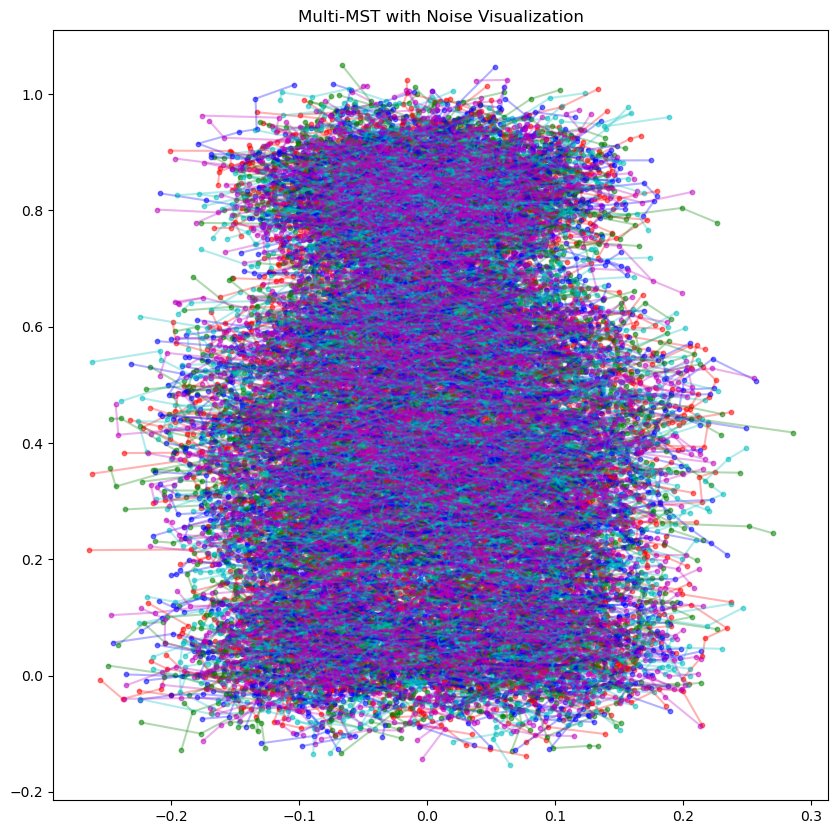

In [23]:
# 生成多个带噪声的MST
msts = generate_multi_mst(points, n_samples=5, noise_level=0.05)

# 可视化这些MST
plot_multi_mst(msts)